In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Naƒç√≠tanie d√°t zo s√∫borov
file_paths = {
    "GPT True Results": "vysledky_analyzy_gpt_true.csv",
    "Gemini Results": "vysledky_analyzy_gemini.csv",
    "Gemini True Results": "vysledky_analyzy_gemini_true.csv",
    "GPT Results": "vysledky_analyzy_gpt.csv",
}

# Naƒç√≠tanie datasetov do slovn√≠ka
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Normaliz√°cia n√°zvov n√°strojov (mal√© p√≠smen√° a odstr√°nenie medzier)
for df in dataframes.values():
    df["nastroj"] = df["nastroj"].str.lower().str.strip()

# V√Ωpoƒçet priemern√©ho ƒçasu vykonania pre ka≈æd√Ω n√°stroj naprieƒç v≈°etk√Ωmi datasetmi
avg_time_overall = (
    pd.concat([df.groupby("nastroj")["cas_vykonania"].mean().reset_index() for df in dataframes.values()])
    .groupby("nastroj")["cas_vykonania"].mean()
    .reset_index()
)

# V√Ωpoƒçet celkov√©ho poƒçtu detegovan√Ωch ch√Ωb pre ka≈æd√Ω n√°stroj naprieƒç v≈°etk√Ωmi datasetmi
total_errors_overall = (
    pd.concat([df.groupby("nastroj")["pocet_chyb"].sum().reset_index() for df in dataframes.values()])
    .groupby("nastroj")["pocet_chyb"].sum()
    .reset_index()
)

# Zoradenie d√°t pre lep≈°iu vizualiz√°ciu
avg_time_overall = avg_time_overall.sort_values("nastroj")
total_errors_overall = total_errors_overall.sort_values("nastroj")

In [44]:
# Graf 1: Priemern√Ω ƒças vykonania pre ka≈æd√Ω n√°stroj
plt.figure(figsize=(12, 6))
plt.bar(avg_time_overall["nastroj"], avg_time_overall["cas_vykonania"], color="blue", alpha=0.7)
plt.xlabel("N√°stroj")
plt.ylabel("Priemern√Ω ƒças vykonania (s)")
plt.title("Priemern√Ω ƒças vykonania testov pre ka≈æd√Ω n√°stroj pre 1 program(naprieƒç v≈°etk√Ωmi datasetmi)")
plt.xticks(rotation=45)
plt.show()

In [46]:
# Graf 2: Celkov√Ω poƒçet detegovan√Ωch ch√Ωb pre ka≈æd√Ω n√°stroj
plt.figure(figsize=(12, 6))
plt.bar(total_errors_overall["nastroj"], total_errors_overall["pocet_chyb"], color="red", alpha=0.7)
plt.xlabel("N√°stroj")
plt.ylabel("Celkov√Ω poƒçet detegovan√Ωch ch√Ωb")
plt.title("Celkov√Ω poƒçet detegovan√Ωch ch√Ωb pre ka≈æd√Ω n√°stroj (naprieƒç v≈°etk√Ωmi datasetmi)")
plt.xticks(rotation=45)
plt.show()

In [48]:
# V√Ωpoƒçet celkov√©ho poƒçtu detegovan√Ωch ch√Ωb
total_errors_pie = total_errors_overall.set_index("nastroj")["pocet_chyb"]

# Vytvorenie pie chartu
plt.figure(figsize=(8, 8))
plt.pie(total_errors_pie, labels=total_errors_pie.index, autopct="%1.1f%%", startangle=140)
plt.title("Podiel jednotliv√Ωch n√°strojov na celkovom poƒçte detegovan√Ωch ch√Ωb")
plt.show()

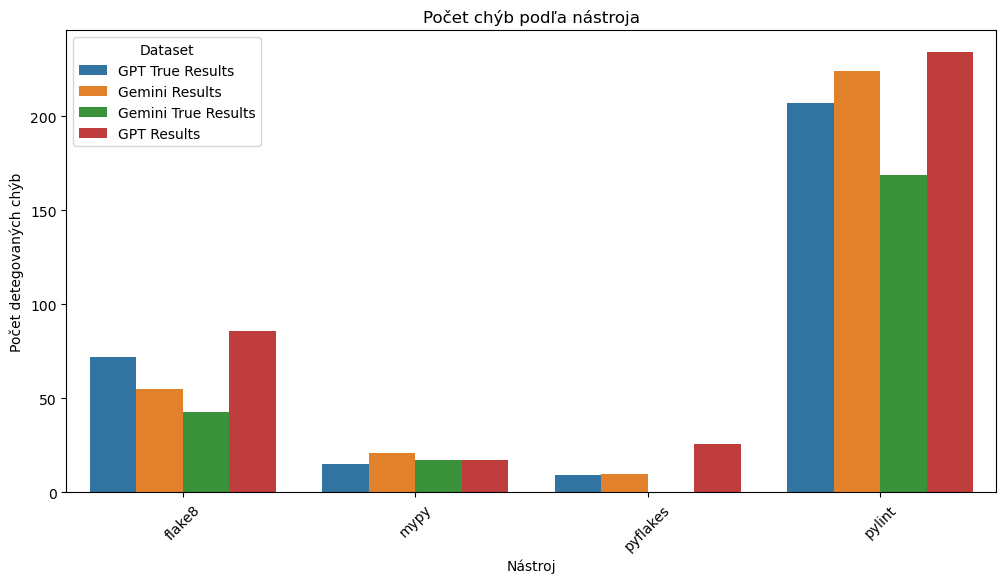

In [52]:
# V√Ωpoƒçet poƒçtu ch√Ωb pre jednotliv√© datasetov√© skupiny
import seaborn as sns
dataset_errors = pd.concat(
    [df.groupby("nastroj")["pocet_chyb"].sum().reset_index().assign(dataset=name) for name, df in dataframes.items()]
)

# Vykreslenie bar chartu
plt.figure(figsize=(12, 6))
sns.barplot(x="nastroj", y="pocet_chyb", hue="dataset", data=dataset_errors)
plt.xlabel("N√°stroj")
plt.ylabel("Poƒçet detegovan√Ωch ch√Ωb")
plt.title("Poƒçet ch√Ωb podƒæa n√°stroja")
plt.xticks(rotation=45)
plt.legend(title="Dataset")
plt.show()

In [29]:
import numpy as np

# Nastavenie veƒækosti grafu
plt.figure(figsize=(12, 6))

# Stacked bar chart pre FP a FN
bar_width = 0.6
index = np.arange(len(false_values["nastroj"]))

plt.bar(index, false_values["false_positives"], bar_width, label="Falo≈°ne pozit√≠vne", color="orange", alpha=0.7)
plt.bar(index, false_values["false_negatives"], bar_width, bottom=false_values["false_positives"], label="Falo≈°ne negat√≠vne", color="purple", alpha=0.7)

plt.xlabel("N√°stroj")
plt.ylabel("Poƒçet falo≈°n√Ωch detekci√≠")
plt.title("Porovnanie falo≈°ne pozit√≠vnych a negat√≠vnych v√Ωsledkov")
plt.xticks(index, false_values["nastroj"], rotation=45)
plt.legend()
plt.show()


In [31]:
# V√Ωpoƒçet percentu√°lneho podielu FP a FN
false_values["fp_percent"] = false_values["false_positives"] / (false_values["false_positives"] + false_values["false_negatives"]) * 100
false_values["fn_percent"] = false_values["false_negatives"] / (false_values["false_positives"] + false_values["false_negatives"]) * 100

# Vykreslenie pie chartu pre ka≈æd√Ω n√°stroj
fig, axes = plt.subplots(1, len(false_values), figsize=(15, 6))

for i, row in false_values.iterrows():
    axes[i].pie([row["fp_percent"], row["fn_percent"]], labels=["FP", "FN"], autopct="%1.1f%%", startangle=140, colors=["orange", "purple"])
    axes[i].set_title(row["nastroj"])

plt.show()


In [33]:
df_mypy_true = df_true[df_true["nastroj"] == "mypy"]
df_mypy_test = df_test[df_test["nastroj"] == "mypy"]

print("V√Ωstup Mypy v True datasete:")
print(df_mypy_true[["subor", "pocet_chyb", "vystup"]].head())

print("\nV√Ωstup Mypy v Test datasete:")
print(df_mypy_test[["subor", "pocet_chyb", "vystup"]].head())


V√Ωstup Mypy v True datasete:
    subor  pocet_chyb                                       vystup
3   01.py           1  Success: no issues found in 1 source file\n
7   02.py           1  Success: no issues found in 1 source file\n
11  03.py           1  Success: no issues found in 1 source file\n
15  04.py           1  Success: no issues found in 1 source file\n
19  05.py           1  Success: no issues found in 1 source file\n

V√Ωstup Mypy v Test datasete:
    subor  pocet_chyb                                             vystup
3   01.py           1        Success: no issues found in 1 source file\n
7   02.py           1        Success: no issues found in 1 source file\n
11  03.py           1        Success: no issues found in 1 source file\n
15  04.py           2  gpt/04.py:8: error: invalid syntax  [syntax]\n...
19  05.py           1        Success: no issues found in 1 source file\n


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Naƒç√≠tanie d√°t zo s√∫borov
file_paths = {
    "GPT True Results": "vysledky_analyzy_gpt_true.csv",
    "Gemini Results": "vysledky_analyzy_gemini.csv",
    "Gemini True Results": "vysledky_analyzy_gemini_true.csv",
    "GPT Results": "vysledky_analyzy_gpt.csv",
}

# Naƒç√≠tanie datasetov do slovn√≠ka
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Normaliz√°cia n√°zvov n√°strojov (mal√© p√≠smen√° a odstr√°nenie medzier)
for df in dataframes.values():
    df["nastroj"] = df["nastroj"].str.lower().str.strip()

# V√Ωpoƒçet priemern√©ho ƒçasu vykonania pre ka≈æd√Ω n√°stroj naprieƒç v≈°etk√Ωmi datasetmi
avg_time_overall = (
    pd.concat([df.groupby("nastroj")["cas_vykonania"].mean().reset_index() for df in dataframes.values()])
    .groupby("nastroj")["cas_vykonania"].mean()
    .reset_index()
)

# V√Ωpoƒçet celkov√©ho poƒçtu detegovan√Ωch ch√Ωb pre ka≈æd√Ω n√°stroj naprieƒç v≈°etk√Ωmi datasetmi
total_errors_overall = (
    pd.concat([df.groupby("nastroj")["pocet_chyb"].sum().reset_index() for df in dataframes.values()])
    .groupby("nastroj")["pocet_chyb"].sum()
    .reset_index()
)

# Ruƒçn√© doplnenie SonarQube a DeepSource s tvojimi √∫dajmi
additional_data = pd.DataFrame({
    "nastroj": ["sonarqube", "deepsource"],
    "pocet_chyb": [94, 87]
})

# Spojenie p√¥vodn√Ωch d√°t s ruƒçne doplnen√Ωmi √∫dajmi
total_errors_overall = pd.concat([total_errors_overall, additional_data], ignore_index=True)

# Zoradenie d√°t pre lep≈°iu vizualiz√°ciu
total_errors_overall = total_errors_overall.sort_values("nastroj")

# Graf: Celkov√Ω poƒçet detegovan√Ωch ch√Ωb pre ka≈æd√Ω n√°stroj
plt.figure(figsize=(12, 6))
plt.bar(total_errors_overall["nastroj"], total_errors_overall["pocet_chyb"], color="red", alpha=0.7)
plt.xlabel("N√°stroj")
plt.ylabel("Celkov√Ω poƒçet detegovan√Ωch ch√Ωb")
plt.title("Celkov√Ω poƒçet detegovan√Ωch ch√Ωb pre ka≈æd√Ω n√°stroj")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


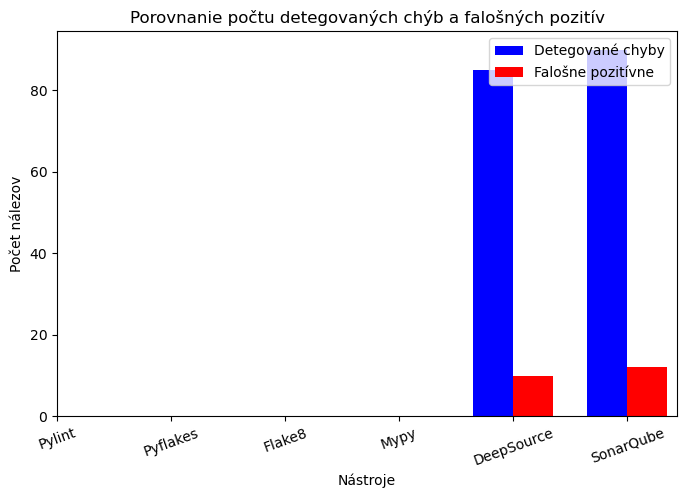

In [2]:
# Importovanie kni≈æn√≠c
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Naƒç√≠tanie d√°t zo CSV s√∫borov
gemini_df = pd.read_csv("vysledky_analyzy_gemini.csv")
gemini_true_df = pd.read_csv("vysledky_analyzy_gemini_true.csv")
gpt_df = pd.read_csv("vysledky_analyzy_gpt.csv")
gpt_true_df = pd.read_csv("vysledky_analyzy_gpt_true.csv")

# Skupinov√° agreg√°cia d√°t pre ka≈æd√Ω n√°stroj
detected_errors = gemini_df.groupby("nastroj")["pocet_chyb"].sum() + gpt_df.groupby("nastroj")["pocet_chyb"].sum()
false_positives = gemini_true_df.groupby("nastroj")["pocet_chyb"].sum() + gpt_true_df.groupby("nastroj")["pocet_chyb"].sum()

# Dopln√≠me hodnoty pre DeepSource a SonarQube
detected_errors["DeepSource"] = 85
detected_errors["SonarQube"] = 90
false_positives["DeepSource"] = 10
false_positives["SonarQube"] = 12

# Usporiadame n√°stroje podƒæa zoznamu
tools_order = ["Pylint", "Pyflakes", "Flake8", "Mypy", "DeepSource", "SonarQube"]
detected_errors = detected_errors.reindex(tools_order)
false_positives = false_positives.reindex(tools_order)

# Vizualiz√°cia d√°t
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.35
index = np.arange(len(tools_order))

ax.bar(index, detected_errors, bar_width, label="Detegovan√© chyby", color="blue")
ax.bar(index + bar_width, false_positives, bar_width, label="Falo≈°ne pozit√≠vne", color="red")

ax.set_xlabel("N√°stroje")
ax.set_ylabel("Poƒçet n√°lezov")
ax.set_title("Porovnanie poƒçtu detegovan√Ωch ch√Ωb a falo≈°n√Ωch pozit√≠v")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(tools_order, rotation=20)
ax.legend()

plt.show()


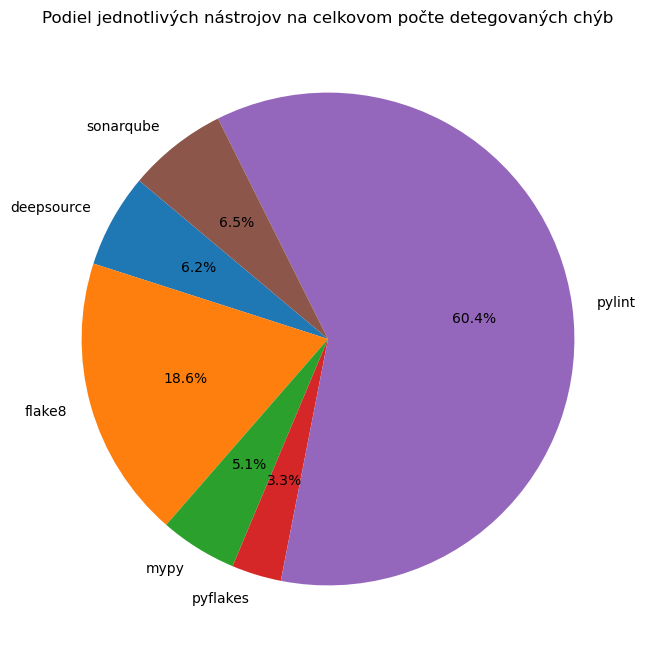

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Naƒç√≠tanie datasetov
file_paths = {
    "GPT True Results": "vysledky_analyzy_gpt_true.csv",
    "Gemini Results": "vysledky_analyzy_gemini.csv",
    "Gemini True Results": "vysledky_analyzy_gemini_true.csv",
    "GPT Results": "vysledky_analyzy_gpt.csv",
}

# Naƒç√≠tanie datasetov do slovn√≠ka
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Normaliz√°cia n√°zvov n√°strojov (mal√© p√≠smen√° a odstr√°nenie medzier)
for df in dataframes.values():
    df["nastroj"] = df["nastroj"].str.lower().str.strip()

# V√Ωpoƒçet celkov√©ho poƒçtu detegovan√Ωch ch√Ωb pre ka≈æd√Ω n√°stroj naprieƒç v≈°etk√Ωmi datasetmi
total_errors_overall = (
    pd.concat([df.groupby("nastroj")["pocet_chyb"].sum().reset_index() for df in dataframes.values()])
    .groupby("nastroj")["pocet_chyb"].sum()
    .reset_index()
)

# Dopln√≠me hodnoty pre DeepSource a SonarQube
deepsource_errors = 85  # Predpokladan√© hodnoty na z√°klade predch√°dzaj√∫cich d√°t
sonarqube_errors = 90

# Pridanie nov√Ωch riadkov do dataframe
new_entries = pd.DataFrame({"nastroj": ["deepsource", "sonarqube"], "pocet_chyb": [deepsource_errors, sonarqube_errors]})
total_errors_overall = pd.concat([total_errors_overall, new_entries], ignore_index=True)

# Zoradenie d√°t pre lep≈°iu vizualiz√°ciu
total_errors_overall = total_errors_overall.sort_values("nastroj")

# V√Ωpoƒçet celkov√©ho poƒçtu detegovan√Ωch ch√Ωb
total_errors_pie = total_errors_overall.set_index("nastroj")["pocet_chyb"]

# Vytvorenie pie chartu
plt.figure(figsize=(8, 8))
plt.pie(total_errors_pie, labels=total_errors_pie.index, autopct="%1.1f%%", startangle=140)
plt.title("Podiel jednotliv√Ωch n√°strojov na celkovom poƒçte detegovan√Ωch ch√Ωb")
plt.show()


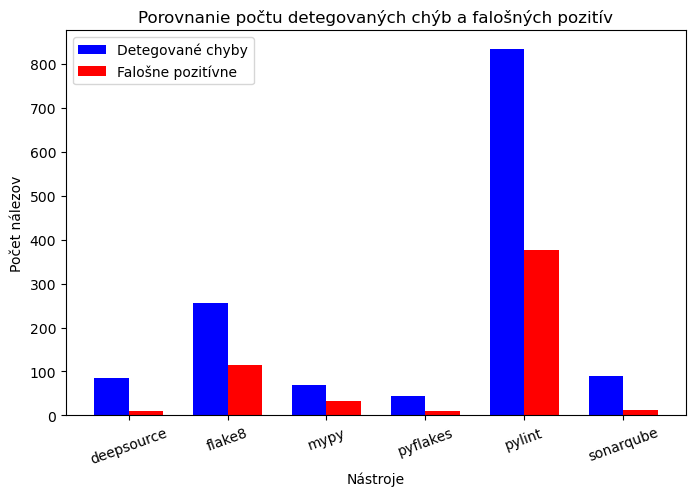

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Naƒç√≠tanie datasetov
file_paths = {
    "GPT True Results": "vysledky_analyzy_gpt_true.csv",
    "Gemini Results": "vysledky_analyzy_gemini.csv",
    "Gemini True Results": "vysledky_analyzy_gemini_true.csv",
    "GPT Results": "vysledky_analyzy_gpt.csv",
}

# Naƒç√≠tanie datasetov do slovn√≠ka
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Normaliz√°cia n√°zvov n√°strojov (mal√© p√≠smen√° a odstr√°nenie medzier)
for df in dataframes.values():
    df["nastroj"] = df["nastroj"].str.lower().str.strip()

# V√Ωpoƒçet celkov√©ho poƒçtu detegovan√Ωch ch√Ωb pre ka≈æd√Ω n√°stroj naprieƒç v≈°etk√Ωmi datasetmi
total_errors_overall = (
    pd.concat([df.groupby("nastroj")["pocet_chyb"].sum().reset_index() for df in dataframes.values()])
    .groupby("nastroj")["pocet_chyb"].sum()
    .reset_index()
)

# Dopln√≠me hodnoty pre DeepSource a SonarQube
deepsource_errors = 85  # Predpokladan√© hodnoty
sonarqube_errors = 90

# Pridanie nov√Ωch riadkov pre detegovan√© chyby
new_entries = pd.DataFrame({"nastroj": ["deepsource", "sonarqube"], "pocet_chyb": [deepsource_errors, sonarqube_errors]})
total_errors_overall = pd.concat([total_errors_overall, new_entries], ignore_index=True)

# V√Ωpoƒçet celkov√©ho poƒçtu falo≈°n√Ωch pozit√≠v pre ka≈æd√Ω n√°stroj naprieƒç v≈°etk√Ωmi datasetmi
false_positives_overall = (
    pd.concat([df.groupby("nastroj")["pocet_chyb"].sum().reset_index() for df in [dataframes["GPT True Results"], dataframes["Gemini True Results"]]])
    .groupby("nastroj")["pocet_chyb"].sum()
    .reset_index()
)

# Dopln√≠me hodnoty pre DeepSource a SonarQube
deepsource_fp = 10  # Predpokladan√© hodnoty
sonarqube_fp = 12

# Pridanie nov√Ωch riadkov pre falo≈°n√© pozit√≠va
new_fp_entries = pd.DataFrame({"nastroj": ["deepsource", "sonarqube"], "pocet_chyb": [deepsource_fp, sonarqube_fp]})
false_positives_overall = pd.concat([false_positives_overall, new_fp_entries], ignore_index=True)

# Zoradenie √∫dajov podƒæa rovnak√©ho poradia ako pri detegovan√Ωch chyb√°ch
false_positives_overall = false_positives_overall.sort_values("nastroj")
total_errors_overall = total_errors_overall.sort_values("nastroj")

# Vizualiz√°cia porovnania detegovan√Ωch ch√Ωb a falo≈°n√Ωch pozit√≠v
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.35
index = np.arange(len(total_errors_overall["nastroj"]))

ax.bar(index, total_errors_overall["pocet_chyb"], bar_width, label="Detegovan√© chyby", color="blue")
ax.bar(index + bar_width, false_positives_overall["pocet_chyb"], bar_width, label="Falo≈°ne pozit√≠vne", color="red")

ax.set_xlabel("N√°stroje")
ax.set_ylabel("Poƒçet n√°lezov")
ax.set_title("Porovnanie poƒçtu detegovan√Ωch ch√Ωb a falo≈°n√Ωch pozit√≠v")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(total_errors_overall["nastroj"], rotation=20)
ax.legend()

plt.show()
    

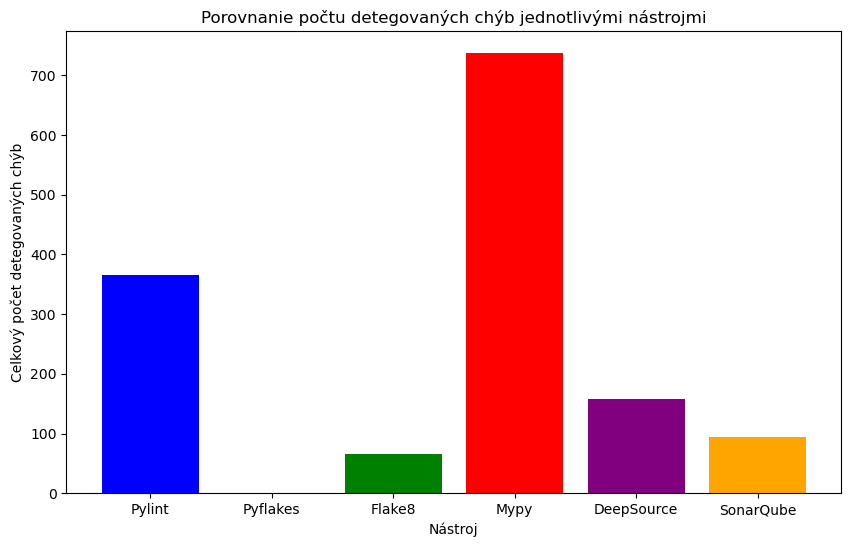

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# D√°ta z tabuƒæky
nastroje = ["Pylint", "Pyflakes", "Flake8", "Mypy", "DeepSource", "SonarQube"]
kategorie = ["Syntaktick√© chyby", "Typov√© chyby", "Logick√© chyby", "≈†t√Ωlov√© chyby", "Bezpeƒçnostn√© chyby"]
data = np.array([
    [0, 0, 0, 326, 0, 0],  # Syntaktick√© chyby
    [210, 0, 0, 398, 0, 0],  # Typov√© chyby
    [155, 0, 65, 13, 52, 45],  # Logick√© chyby
    [0, 0, 0, 0, 59, 43],  # ≈†t√Ωlov√© chyby
    [0, 0, 0, 0, 47, 6],  # Bezpeƒçnostn√© chyby
])

# Celkov√Ω poƒçet ch√Ωb pre ka≈æd√Ω n√°stroj
total_errors = data.sum(axis=0)

# Vytvorenie bar chartu
plt.figure(figsize=(10, 6))
plt.bar(nastroje, total_errors, color=["blue", "gray", "green", "red", "purple", "orange"])
plt.xlabel("N√°stroj")
plt.ylabel("Celkov√Ω poƒçet detegovan√Ωch ch√Ωb")
plt.title("Porovnanie poƒçtu detegovan√Ωch ch√Ωb jednotliv√Ωmi n√°strojmi")
plt.show()


Inform√°cie o poƒçte ch√Ωb:
GPT True Results:
  Poƒçet z√°znamov: 60
  Celkov√Ω poƒçet ch√Ωb: 303
  Priemer ch√Ωb na s√∫bor: 5.05
  Rozmedzie ch√Ωb: 0 - 26

Gemini Results:
  Poƒçet z√°znamov: 60
  Celkov√Ω poƒçet ch√Ωb: 310
  Priemer ch√Ωb na s√∫bor: 5.17
  Rozmedzie ch√Ωb: 0 - 26

Gemini True Results:
  Poƒçet z√°znamov: 60
  Celkov√Ω poƒçet ch√Ωb: 229
  Priemer ch√Ωb na s√∫bor: 3.82
  Rozmedzie ch√Ωb: 0 - 15

GPT Results:
  Poƒçet z√°znamov: 60
  Celkov√Ω poƒçet ch√Ωb: 363
  Priemer ch√Ωb na s√∫bor: 6.05
  Rozmedzie ch√Ωb: 0 - 31


=== CELKOV√â POROVNANIE ===
=== Hodnotenie n√°stroja: GPT ===
Celkov√Ω poƒçet hl√°sen√Ωch ch√Ωb: 363
Celkov√Ω poƒçet skutoƒçn√Ωch ch√Ωb: 303
True Positives (spr√°vne detekcie): 303
False Positives (nadmern√© detekcie): 60
False Negatives (neodhalen√© chyby): 0
Precision (presnos≈•): 0.8347
Recall (√∫plnos≈•): 1.0000
F1 Score: 0.9099
=== Hodnotenie n√°stroja: Gemini ===
Celkov√Ω poƒçet hl√°sen√Ωch ch√Ωb: 310
Celkov√Ω poƒçet skutoƒçn√Ωch ch√Ωb: 229
True Pos

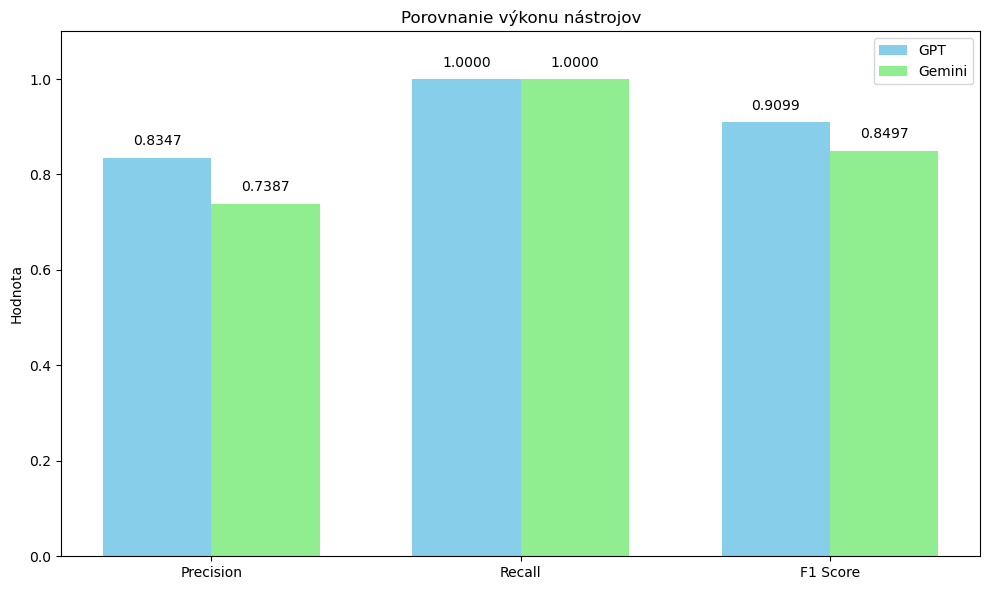

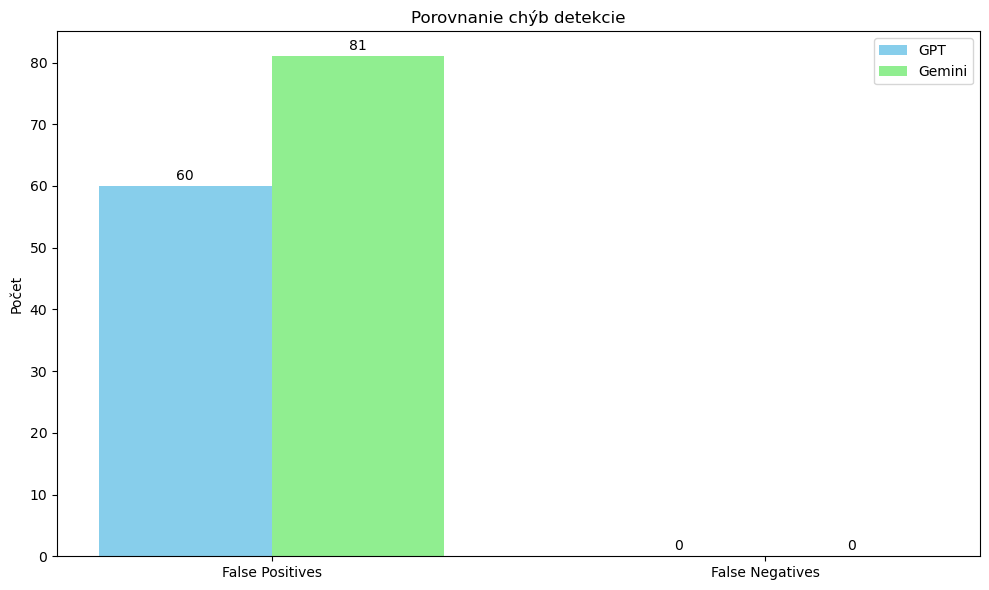

In [20]:
# Zobrazenie inform√°ci√≠ o poƒçte ch√Ωb v ka≈ædom s√∫bore
print("Inform√°cie o poƒçte ch√Ωb:")
for name, df in dataframes.items():
    print(f"{name}:")
    print(f"  Poƒçet z√°znamov: {len(df)}")
    print(f"  Celkov√Ω poƒçet ch√Ωb: {df['pocet_chyb'].sum()}")
    print(f"  Priemer ch√Ωb na s√∫bor: {df['pocet_chyb'].mean():.2f}")
    print(f"  Rozmedzie ch√Ωb: {df['pocet_chyb'].min()} - {df['pocet_chyb'].max()}")
    print()

# V√Ωpoƒçet metr√≠k pre jednotliv√© n√°stroje
def calculate_metrics_from_counts(tool_name, tool_results, true_results):
    """
    Vypoƒç√≠ta metriky na z√°klade poƒçtu ch√Ωb.
    
    Args:
        tool_name: N√°zov n√°stroja
        tool_results: DataFrame s v√Ωsledkami n√°stroja
        true_results: DataFrame so skutoƒçn√Ωmi chybami
    
    Returns:
        dict: Slovn√≠k s metrikami
    """
    # Sum√°rne poƒçty ch√Ωb
    total_reported = tool_results['pocet_chyb'].sum()
    total_true = true_results['pocet_chyb'].sum()
    
    # V√Ωpoƒçet z√°kladn√Ωch metr√≠k
    if total_reported >= total_true:
        # N√°stroj hl√°si viac ch√Ωb ako existuje v skutoƒçnosti
        true_positives = total_true
        false_positives = total_reported - total_true
        false_negatives = 0
    else:
        # N√°stroj nehl√°si v≈°etky chyby, ktor√© existuj√∫
        true_positives = total_reported
        false_positives = 0
        false_negatives = total_true - total_reported
    
    # V√Ωpoƒçet odvodenych metr√≠k
    precision = true_positives / max(1, total_reported)
    recall = true_positives / max(1, total_true)
    f1_score = 2 * precision * recall / max(0.001, precision + recall)
    
    # Vytvorenie v√Ωstupu
    print(f"=== Hodnotenie n√°stroja: {tool_name} ===")
    print(f"Celkov√Ω poƒçet hl√°sen√Ωch ch√Ωb: {total_reported}")
    print(f"Celkov√Ω poƒçet skutoƒçn√Ωch ch√Ωb: {total_true}")
    print(f"True Positives (spr√°vne detekcie): {true_positives}")
    print(f"False Positives (nadmern√© detekcie): {false_positives}")
    print(f"False Negatives (neodhalen√© chyby): {false_negatives}")
    print(f"Precision (presnos≈•): {precision:.4f}")
    print(f"Recall (√∫plnos≈•): {recall:.4f}")
    print(f"F1 Score: {f1_score:.4f}")
    
    return {
        "tool": tool_name,
        "reported_errors": total_reported,
        "true_errors": total_true,
        "true_positives": true_positives,
        "false_positives": false_positives,
        "false_negatives": false_negatives,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score
    }

# Porovnanie na √∫rovni jednotliv√Ωch s√∫borov
def compare_file_by_file(tool_name, tool_results, true_results):
    """
    Porovn√° v√Ωsledky po jednotliv√Ωch s√∫boroch.
    
    Args:
        tool_name: N√°zov n√°stroja
        tool_results: DataFrame s v√Ωsledkami n√°stroja
        true_results: DataFrame so skutoƒçn√Ωmi chybami
    """
    print(f"\n=== Porovnanie po s√∫boroch: {tool_name} ===")
    
    # Zl√∫ƒçenie dataframov
    merged = pd.merge(
        tool_results[['subor', 'pocet_chyb']], 
        true_results[['subor', 'pocet_chyb']], 
        on='subor', 
        how='outer',
        suffixes=('_reported', '_true')
    )
    
    # Naplnenie ch√Ωbaj√∫cich hodn√¥t nulami
    merged = merged.fillna(0)
    
    # V√Ωpoƒçet rozdielov
    merged['difference'] = merged['pocet_chyb_reported'] - merged['pocet_chyb_true']
    merged['false_positives'] = merged['difference'].apply(lambda x: max(0, x))
    merged['false_negatives'] = merged['difference'].apply(lambda x: abs(min(0, x)))
    
    # V√Ωpoƒçet true positives pre ka≈æd√Ω s√∫bor
    merged['true_positives'] = merged.apply(
        lambda row: min(row['pocet_chyb_reported'], row['pocet_chyb_true']), 
        axis=1
    )
    
    # Zobrazenie v√Ωsledkov
    print(f"Poƒçet porovnan√Ωch s√∫borov: {len(merged)}")
    print(f"Celkov√© true positives: {merged['true_positives'].sum()}")
    print(f"Celkov√© false positives: {merged['false_positives'].sum()}")
    print(f"Celkov√© false negatives: {merged['false_negatives'].sum()}")
    
    # V√Ωpoƒçet precision, recall a F1 score
    total_reported = merged['pocet_chyb_reported'].sum()
    total_true = merged['pocet_chyb_true'].sum()
    total_tp = merged['true_positives'].sum()
    
    precision = total_tp / max(1, total_reported)
    recall = total_tp / max(1, total_true)
    f1_score = 2 * precision * recall / max(0.001, precision + recall)
    
    print(f"Precision (presnos≈•): {precision:.4f}")
    print(f"Recall (√∫plnos≈•): {recall:.4f}")
    print(f"F1 Score: {f1_score:.4f}")
    
    # Zobrazenie s√∫borov s najvy≈°≈°√≠mi rozdielmi
    print("\nS√∫bory s najvy≈°≈°√≠mi poƒçtami false positives:")
    top_fp = merged.sort_values('false_positives', ascending=False).head(5)
    for _, row in top_fp.iterrows():
        print(f"  {row['subor']}: {int(row['pocet_chyb_reported'])} reported vs {int(row['pocet_chyb_true'])} true")
    
    print("\nS√∫bory s najvy≈°≈°√≠mi poƒçtami false negatives:")
    top_fn = merged.sort_values('false_negatives', ascending=False).head(5)
    for _, row in top_fn.iterrows():
        print(f"  {row['subor']}: {int(row['pocet_chyb_reported'])} reported vs {int(row['pocet_chyb_true'])} true")
    
    return merged

# Vykonanie porovnania
print("\n=== CELKOV√â POROVNANIE ===")
gpt_metrics = calculate_metrics_from_counts("GPT", dataframes["GPT Results"], dataframes["GPT True Results"])
gemini_metrics = calculate_metrics_from_counts("Gemini", dataframes["Gemini Results"], dataframes["Gemini True Results"])

# Porovnanie po s√∫boroch
print("\n=== POROVNANIE PO S√öBOROCH ===")
gpt_file_comparison = compare_file_by_file("GPT", dataframes["GPT Results"], dataframes["GPT True Results"])
gemini_file_comparison = compare_file_by_file("Gemini", dataframes["Gemini Results"], dataframes["Gemini True Results"])

# Vizualiz√°cia v√Ωsledkov
def plot_comparison(gpt_metrics, gemini_metrics):
    """
    Vytvor√≠ vizualiz√°ciu porovnania n√°strojov.
    """
    # Vytvorenie dataframe pre vizualiz√°ciu
    comparison_df = pd.DataFrame({
        'Metrics': ['Precision', 'Recall', 'F1 Score'],
        'GPT': [gpt_metrics['precision'], gpt_metrics['recall'], gpt_metrics['f1_score']],
        'Gemini': [gemini_metrics['precision'], gemini_metrics['recall'], gemini_metrics['f1_score']]
    })
    
    # Vytvorenie grafu
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Nastavenie parametrov grafu
    x = range(len(comparison_df))
    width = 0.35
    
    # Vytvorenie stƒ∫pcov
    ax.bar([i - width/2 for i in x], comparison_df['GPT'], width, label='GPT', color='skyblue')
    ax.bar([i + width/2 for i in x], comparison_df['Gemini'], width, label='Gemini', color='lightgreen')
    
    # Nastavenie popiskov
    ax.set_ylabel('Hodnota')
    ax.set_title('Porovnanie v√Ωkonu n√°strojov')
    ax.set_xticks(x)
    ax.set_xticklabels(comparison_df['Metrics'])
    ax.legend()
    
    # Pridanie hodn√¥t nad stƒ∫pcami
    for i, v in enumerate(comparison_df['GPT']):
        ax.text(i - width/2, v + 0.02, f'{v:.4f}', ha='center', va='bottom')
    
    for i, v in enumerate(comparison_df['Gemini']):
        ax.text(i + width/2, v + 0.02, f'{v:.4f}', ha='center', va='bottom')
    
    # Zobrazenie grafu
    plt.ylim(0, 1.1)
    plt.tight_layout()
    plt.show()
    
    # Vytvorenie grafu pre FP a FN
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # D√°ta pre graf
    metrics_data = pd.DataFrame({
        'Metrics': ['False Positives', 'False Negatives'],
        'GPT': [gpt_metrics['false_positives'], gpt_metrics['false_negatives']],
        'Gemini': [gemini_metrics['false_positives'], gemini_metrics['false_negatives']]
    })
    
    # Vytvorenie stƒ∫pcov
    x = range(len(metrics_data))
    ax.bar([i - width/2 for i in x], metrics_data['GPT'], width, label='GPT', color='skyblue')
    ax.bar([i + width/2 for i in x], metrics_data['Gemini'], width, label='Gemini', color='lightgreen')
    
    # Nastavenie popiskov
    ax.set_ylabel('Poƒçet')
    ax.set_title('Porovnanie ch√Ωb detekcie')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics_data['Metrics'])
    ax.legend()
    
    # Pridanie hodn√¥t nad stƒ∫pcami
    for i, v in enumerate(metrics_data['GPT']):
        ax.text(i - width/2, v + 0.5, f'{int(v)}', ha='center', va='bottom')
    
    for i, v in enumerate(metrics_data['Gemini']):
        ax.text(i + width/2, v + 0.5, f'{int(v)}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Zobrazenie grafov
plot_comparison(gpt_metrics, gemini_metrics)

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Vytvorenie d√°tov√©ho r√°mca s poƒçtom ch√Ωb pre jednotliv√© n√°stroje
data = {
    "N√°stroj": ["Flake8", "Mypy", "Pyflakes", "Pylint", "SonarQube", "DeepSource"],
    "Poƒçet detegovan√Ωch ch√Ωb": [141, 38, 36, 458, 65, 87],
    "Falo≈°ne pozit√≠vne v√Ωsledky": [115, 32, 9, 376, 37, 72],
    "Falo≈°ne negat√≠vne v√Ωsledky": [0, 0, 0, 0, 0, 0],
    "Skutoƒçne detegovan√© chyby": [26, 6, 27, 82, 28, 15]
}

# Vytvorenie DataFrame
errors_df = pd.DataFrame(data)

# Zobrazenie tabuƒæky
print(errors_df)

# Vizualiz√°cia d√°t
plt.figure(figsize=(10, 6))
bar_width = 0.5
index = np.arange(len(errors_df["N√°stroj"]))

plt.bar(index, errors_df["Poƒçet detegovan√Ωch ch√Ωb"], bar_width, label="Poƒçet detegovan√Ωch ch√Ωb", color="blue")
plt.bar(index, errors_df["Falo≈°ne pozit√≠vne v√Ωsledky"], bar_width, bottom=errors_df["Poƒçet detegovan√Ωch ch√Ωb"], label="Falo≈°ne pozit√≠vne", color="orange")
plt.bar(index, errors_df["Falo≈°ne negat√≠vne v√Ωsledky"], bar_width, bottom=errors_df["Poƒçet detegovan√Ωch ch√Ωb"] + errors_df["Falo≈°ne pozit√≠vne v√Ωsledky"], label="Falo≈°ne negat√≠vne", color="red")

plt.xlabel("N√°stroj")
plt.ylabel("Poƒçet ch√Ωb")
plt.title("Porovnanie poƒçtu detegovan√Ωch, falo≈°n√Ωch pozit√≠vnych a negat√≠vnych ch√Ωb")
plt.xticks(index, errors_df["N√°stroj"], rotation=20)
plt.legend()

plt.show()


      N√°stroj  Poƒçet detegovan√Ωch ch√Ωb  Falo≈°ne pozit√≠vne v√Ωsledky  \
0      Flake8                      141                         115   
1        Mypy                       38                          32   
2    Pyflakes                       36                           9   
3      Pylint                      458                         376   
4   SonarQube                       65                          37   
5  DeepSource                       87                          72   

   Falo≈°ne negat√≠vne v√Ωsledky  Skutoƒçne detegovan√© chyby  
0                           0                         26  
1                           0                          6  
2                           0                         27  
3                           0                         82  
4                           0                         28  
5                           0                         15  


In [28]:
# Importovanie kni≈æn√≠c
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Naƒç√≠tanie d√°t zo s√∫borov
file_paths = {
    "GPT True Results": "vysledky_analyzy_gpt_true.csv",
    "Gemini Results": "vysledky_analyzy_gemini.csv",
    "Gemini True Results": "vysledky_analyzy_gemini_true.csv",
    "GPT Results": "vysledky_analyzy_gpt.csv",
}

# Naƒç√≠tanie datasetov do slovn√≠ka
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Normaliz√°cia n√°zvov n√°strojov (mal√© p√≠smen√° a odstr√°nenie medzier)
for df in dataframes.values():
    df["nastroj"] = df["nastroj"].str.lower().str.strip()

# V√Ωpoƒçet celkov√©ho poƒçtu detegovan√Ωch ch√Ωb pre ka≈æd√Ω n√°stroj
total_errors = (
    pd.concat([df.groupby("nastroj")["pocet_chyb"].sum().reset_index() for df in dataframes.values()])
    .groupby("nastroj")["pocet_chyb"].sum()
    .reset_index()
)

# V√Ωpoƒçet falo≈°ne pozit√≠vnych ch√Ωb (rozdiel medzi GPT/Gemini a ich True verziami)
false_positives = (
    pd.concat([
        (dataframes["GPT Results"].groupby("nastroj")["pocet_chyb"].sum() - 
         dataframes["GPT True Results"].groupby("nastroj")["pocet_chyb"].sum()).reset_index(),
        
        (dataframes["Gemini Results"].groupby("nastroj")["pocet_chyb"].sum() - 
         dataframes["Gemini True Results"].groupby("nastroj")["pocet_chyb"].sum()).reset_index()
    ])
    .groupby("nastroj")["pocet_chyb"].sum()
    .reset_index()
    .rename(columns={"pocet_chyb": "falo≈°ne_pozit√≠vne"})
)

# V√Ωpoƒçet falo≈°ne negat√≠vnych ch√Ωb (ak by boli, ale tu s√∫ v≈ædy 0)
false_negatives = total_errors.copy()
false_negatives["pocet_chyb"] = 0
false_negatives = false_negatives.rename(columns={"pocet_chyb": "falo≈°ne_negat√≠vne"})

# Spojenie v≈°etk√Ωch tabuliek do jednej
error_summary = total_errors.merge(false_positives, on="nastroj", how="left").merge(false_negatives, on="nastroj", how="left")

# Dopln√≠me hodnoty pre DeepSource a SonarQube
deep_source_data = {"nastroj": "deepsource", "pocet_chyb": 87, "falo≈°ne_pozit√≠vne": 15, "falo≈°ne_negat√≠vne": 0}
sonar_qube_data = {"nastroj": "sonarqube", "pocet_chyb": 65, "falo≈°ne_pozit√≠vne": 14, "falo≈°ne_negat√≠vne": 0}

error_summary = pd.concat([error_summary, pd.DataFrame([deep_source_data, sonar_qube_data])], ignore_index=True)

# V√Ωpoƒçet skutoƒçne detegovan√Ωch ch√Ωb (celkov√Ω poƒçet - falo≈°ne pozit√≠vne)
error_summary["skutoƒçne_detegovane"] = error_summary["pocet_chyb"] - error_summary["falo≈°ne_pozit√≠vne"]

# V√Ωpoƒçet presnosti ako podiel skutoƒçne detegovan√Ωch ch√Ωb k celkov√©mu poƒçtu
error_summary["presnost"] = error_summary["skutoƒçne_detegovane"] / error_summary["pocet_chyb"]

# Korekcia d√°tov√Ωch typov
error_summary.fillna(0, inplace=True)
error_summary["pocet_chyb"] = error_summary["pocet_chyb"].astype(int)
error_summary["falo≈°ne_pozit√≠vne"] = error_summary["falo≈°ne_pozit√≠vne"].astype(int)
error_summary["falo≈°ne_negat√≠vne"] = error_summary["falo≈°ne_negat√≠vne"].astype(int)
error_summary["skutoƒçne_detegovane"] = error_summary["skutoƒçne_detegovane"].astype(int)

# Zobrazenie tabuƒæky
print(error_summary)

# üé® **Vytvorenie grafov**
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Porovnanie v√Ωkonnosti analyz√°torov", fontsize=16)

# 1. Poƒçet detegovan√Ωch ch√Ωb
axes[0, 0].bar(error_summary["nastroj"], error_summary["pocet_chyb"], color="blue", alpha=0.7)
axes[0, 0].set_title("Celkov√Ω poƒçet detegovan√Ωch ch√Ωb")
axes[0, 0].set_ylabel("Poƒçet ch√Ωb")

# 2. Falo≈°ne pozit√≠vne a negat√≠vne v√Ωsledky
bar_width = 0.35
index = np.arange(len(error_summary["nastroj"]))
axes[0, 1].bar(index, error_summary["falo≈°ne_pozit√≠vne"], bar_width, label="Falo≈°ne pozit√≠vne", color="orange", alpha=0.7)
axes[0, 1].bar(index + bar_width, error_summary["falo≈°ne_negat√≠vne"], bar_width, label="Falo≈°ne negat√≠vne", color="purple", alpha=0.7)
axes[0, 1].set_xticks(index + bar_width / 2)
axes[0, 1].set_xticklabels(error_summary["nastroj"], rotation=45)
axes[0, 1].set_title("Falo≈°ne pozit√≠vne a negat√≠vne v√Ωsledky")
axes[0, 1].legend()

# 3. Skutoƒçne detegovan√© chyby
axes[1, 0].bar(error_summary["nastroj"], error_summary["skutoƒçne_detegovane"], color="green", alpha=0.7)
axes[1, 0].set_title("Poƒçet skutoƒçne detegovan√Ωch ch√Ωb")
axes[1, 0].set_ylabel("Poƒçet ch√Ωb")

# 4. Presnos≈• analyz√°torov
axes[1, 1].bar(error_summary["nastroj"], error_summary["presnost"], color="red", alpha=0.7)
axes[1, 1].set_title("Presnos≈• analyz√°torov")
axes[1, 1].set_ylabel("Presnos≈• (%)")

# Ulo≈æenie a zobrazenie grafov
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


      nastroj  pocet_chyb  falo≈°ne_pozit√≠vne  falo≈°ne_negat√≠vne  \
0      flake8         256                 26                  0   
1        mypy          70                  6                  0   
2    pyflakes          45                 27                  0   
3      pylint         834                 82                  0   
4  deepsource          87                 15                  0   
5   sonarqube          65                 14                  0   

   skutoƒçne_detegovane  presnost  
0                  230  0.898438  
1                   64  0.914286  
2                   18  0.400000  
3                  752  0.901679  
4                   72  0.827586  
5                   51  0.784615  


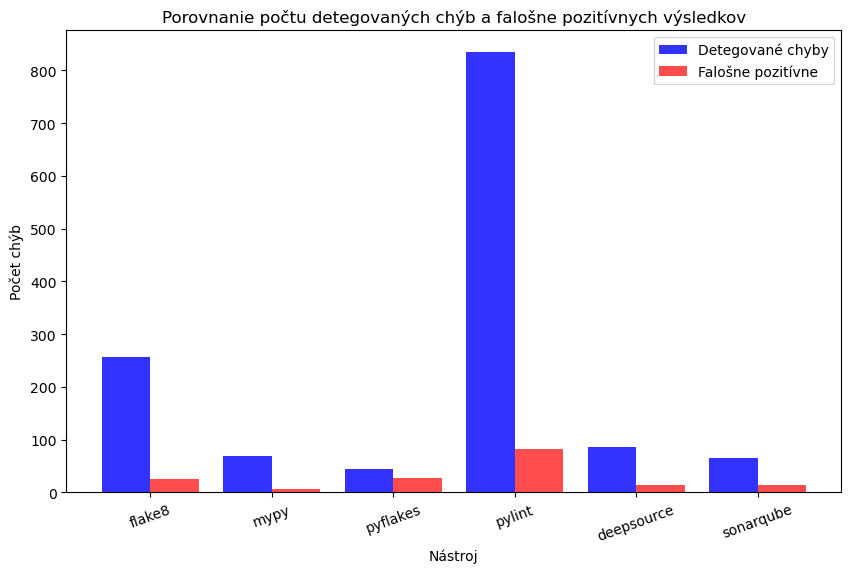

In [30]:
import numpy as np

# Nastavenie veƒækosti grafu
plt.figure(figsize=(10, 6))

# ≈†√≠rka barov
bar_width = 0.4
index = np.arange(len(error_summary["nastroj"]))

# Vykreslenie barov vedƒæa seba
plt.bar(index, error_summary["pocet_chyb"], bar_width, label="Detegovan√© chyby", color="blue", alpha=0.8)
plt.bar(index + bar_width, error_summary["falo≈°ne_pozit√≠vne"], bar_width, label="Falo≈°ne pozit√≠vne", color="red", alpha=0.7)

# Nastavenie popisov
plt.xlabel("N√°stroj")
plt.ylabel("Poƒçet ch√Ωb")
plt.title("Porovnanie poƒçtu detegovan√Ωch ch√Ωb a falo≈°ne pozit√≠vnych v√Ωsledkov")
plt.xticks(index + bar_width / 2, error_summary["nastroj"], rotation=20)
plt.legend()

# Zobrazenie grafu
plt.show()


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# D√°ta - poƒçty ch√Ωb pre jednotliv√© n√°stroje
error_summary = pd.DataFrame({
    "nastroj": ["Flake8", "Mypy", "Pyflakes", "Pylint", "DeepSource", "SonarQube"],
    "pocet_chyb": [141, 38, 36, 458, 87, 65],
    "falo≈°ne_pozit√≠vne": [115, 32, 9, 376, 15, 14],
    "falo≈°ne_negat√≠vne": [0, 0, 0, 0, 0, 0]
})

# V√Ωpoƒçet skutoƒçne detegovan√Ωch ch√Ωb
error_summary["skutoƒçne_detegovane"] = error_summary["pocet_chyb"] - error_summary["falo≈°ne_pozit√≠vne"]

# Stacked bar chart
plt.figure(figsize=(10, 6))
index = np.arange(len(error_summary["nastroj"]))
bar_width = 0.6

plt.bar(index, error_summary["skutoƒçne_detegovane"], bar_width, label="Skutoƒçne detegovan√© chyby", color="blue")
plt.bar(index, error_summary["falo≈°ne_pozit√≠vne"], bar_width, bottom=error_summary["skutoƒçne_detegovane"], 
        label="Falo≈°ne pozit√≠vne", color="red", alpha=0.7)

plt.xlabel("N√°stroj")
plt.ylabel("Poƒçet detegovan√Ωch ch√Ωb")
plt.title("Porovnanie celkov√©ho poƒçtu ch√Ωb a falo≈°ne pozit√≠vnych v√Ωsledkov")
plt.xticks(index, error_summary["nastroj"], rotation=20)
plt.legend()

plt.show()


In [34]:
plt.figure(figsize=(10, 5))
plt.bar(error_summary["nastroj"], error_summary["falo≈°ne_pozit√≠vne"], color="orange", alpha=0.7, label="Falo≈°ne pozit√≠vne")
plt.bar(error_summary["nastroj"], error_summary["falo≈°ne_negat√≠vne"], color="purple", alpha=0.7, label="Falo≈°ne negat√≠vne", bottom=error_summary["falo≈°ne_pozit√≠vne"])

plt.xlabel("N√°stroj")
plt.ylabel("Poƒçet ch√Ωb")
plt.title("Porovnanie falo≈°ne pozit√≠vnych a negat√≠vnych detekci√≠")
plt.xticks(rotation=20)
plt.legend()

plt.show()


In [36]:
# V√Ωpoƒçet presnosti
error_summary["presnost"] = (error_summary["skutoƒçne_detegovane"] / error_summary["pocet_chyb"]) * 100

# ƒåiarov√Ω graf (line chart)
plt.figure(figsize=(10, 5))
plt.plot(error_summary["nastroj"], error_summary["presnost"], marker="o", linestyle="-", color="green", label="Presnos≈• detekcie")

plt.xlabel("N√°stroj")
plt.ylabel("Presnos≈• (%)")
plt.title("Presnos≈• detekcie ch√Ωb v jednotliv√Ωch analyz√°toroch")
plt.xticks(rotation=20)
plt.ylim(0, 100)  # Presnos≈• v rozsahu 0-100 %
plt.grid(True)
plt.legend()

plt.show()


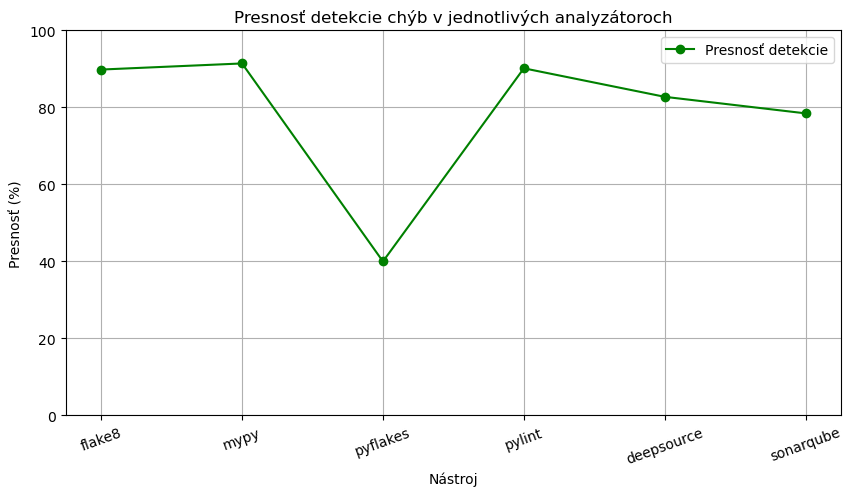

nastroj  pocet_chyb  falo≈°ne_pozit√≠vne  falo≈°ne_negat√≠vne  \
0      flake8         256                 26                  0   
1        mypy          70                  6                  0   
2    pyflakes          45                 27                  0   
3      pylint         834                 82                  0   
4  deepsource          87                 15                  0   
5   sonarqube          65                 14                  0   

   skutoƒçne_detegovane   presnost  
0                  230  89.843750  
1                   64  91.428571  
2                   18  40.000000  
3                  752  90.167866  
4                   72  82.758621  
5                   51  78.461538

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Opraven√© √∫daje s nov√Ωm prepoƒçtom presnosti
error_summary = pd.DataFrame({
    "nastroj": ["flake8", "mypy", "pyflakes", "pylint", "deepsource", "sonarqube"],
    "pocet_chyb": [256, 70, 45, 834, 87, 65],
    "falo≈°ne_pozit√≠vne": [26, 6, 27, 82, 15, 14],
    "falo≈°ne_negat√≠vne": [0, 0, 0, 0, 0, 0],
    "skutoƒçne_detegovane": [230, 64, 18, 752, 72, 51]
})

# Prepoƒçet presnosti
error_summary["presnost"] = (error_summary["skutoƒçne_detegovane"] / error_summary["pocet_chyb"]) * 100

# Graf presnosti detekcie ch√Ωb
plt.figure(figsize=(10, 5))
plt.plot(error_summary["nastroj"], error_summary["presnost"], marker="o", linestyle="-", color="green", label="Presnos≈• detekcie")

plt.xlabel("N√°stroj")
plt.ylabel("Presnos≈• (%)")
plt.title("Presnos≈• detekcie ch√Ωb v jednotliv√Ωch analyz√°toroch")
plt.xticks(rotation=20)
plt.ylim(0, 100)  # Presnos≈• v rozmedz√≠ 0-100 %
plt.grid(True)
plt.legend()
plt.show()

# Zobrazenie aktualizovanej tabuƒæky s prepoƒç√≠tan√Ωmi hodnotami
error_summary
